# Classification of Branches of Mathematics using Wikipedia Links


## Explanation of Dataset
The data is open to the public via University of California Irvine's Machine Learning Repository website in the form of .json file. ([link to the dataset](https://archive.ics.uci.edu/ml/datasets/Wikipedia+Math+Essentials)) And the data is given in the form of dictionary file of length 735. The first 4 keys are `edges`, `weights`, `node_ids`, `time_periods`. The `edges` is the list of tuples, where each tuple is in the form of list of two nodes which are connected. Here, the connection implies whether there is a link from one node to another or vice versa, so the graph is not directed. The first component of a tuple is always samller than the seconde value of the tuple and there is a total of 27079 edges. `weights` is list of numbers indicating how many links in between the two set of nodes in `edges`. So, this indicates the strength of the connection. `node_ids` provides a dictionary with keys for the name of the Wikipedia website and values for the corresponding node indices. For example, `Mathematics` corresponds to `0` and `Function (mathematics)` is `70`. The length of the `node_ids` is 1068, so a total of 1068 webpages is recorded. The key `time_periods` is just one number 731 since the following 731 keys contains the information of number of visits of each site for 731 days from March 2019 to March 2021.

## Loading the dataset

In [1062]:
import json
import numpy as np
from matplotlib import pyplot as plt

with open("data.json", 'r') as json_file:
    data = json.load(json_file)

In [1063]:
# Check the data type and the length
print("Type of the data is {} and its length is {}".format(type(data), len(data)))

Type of the data is <class 'dict'> and its length is 735


In [1064]:
# Check the keys
data.keys()

dict_keys(['edges', 'weights', 'node_ids', 'time_periods', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '

In [1065]:
# The key `edges` consist of list of tuples and there are a total of 
print("There is a total of {} edges.".format(len(data['edges'])))
print("Some examples of edges are {}".format(data['edges'][:20]))

There is a total of 27079 edges.
Some examples of edges are [[0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [0, 13], [0, 14], [0, 15], [0, 16], [0, 17], [0, 18], [0, 19], [0, 20]]


In [1066]:
# value of `weights` is a list of numbers
data['weights'][:20]

[1, 4, 2, 2, 5, 4, 4, 2, 1, 2, 1, 3, 4, 1, 2, 2, 2, 1, 1, 1]

In [1067]:
# value of `node_ids` is a dictionary assigning node index to each topic
print("The type of data['node_ids'] is ", type(data['node_ids']))
print("The index for `mathematics` is {}".format(data['node_ids']['Mathematics']))
print("Some examples of the dicationary are")
list(data['node_ids'].items())[0:10]

The type of data['node_ids'] is  <class 'dict'>
The index for `mathematics` is 0
Some examples of the dicationary are


[('Mathematics', 0),
 ('Mathematician', 413),
 ('Applied mathematics', 12),
 ('Pure mathematics', 15),
 ('Recreational mathematics', 35),
 ('Arithmetic', 16),
 ('Counting', 8),
 ('Cardinal number', 68),
 ('Tally marks', 361),
 ('Addition', 18)]

To easily find the topic from its node index, let's creat the reverse dictionary of `data['weights']`, where the keys are the node indices and the values are the corresponding title of the webpage.

In [1068]:
# Define a dictionary form ### Loading the datasetnode number to the topic
idx_to_topic = dict()
for key, value in data['node_ids'].items():
    idx_to_topic[value] = key

In [1069]:
print("Some examples of the inverse dictionay are")
list(idx_to_topic.items())[:10]

Some examples of the inverse dictionay are


[(0, 'Mathematics'),
 (413, 'Mathematician'),
 (12, 'Applied mathematics'),
 (15, 'Pure mathematics'),
 (35, 'Recreational mathematics'),
 (16, 'Arithmetic'),
 (8, 'Counting'),
 (68, 'Cardinal number'),
 (361, 'Tally marks'),
 (18, 'Addition')]

### Some Rudimentary Analysis

Let's find the nodes which has 200 or more edges.

In [1070]:
edges = data['edges']
n_nodes = len(data['node_ids'])
n_edges = [0] * n_nodes
for edge in edges:
    i, j = edge
    n_edges[i] += 1
    n_edges[j] += 1
    
freq_nodes = []
for i in range(len(n_edges)):
    if n_edges[i] >= 200:
        freq_nodes.append(i)
        
print('List of topics with 200 or more edges\n')
print('{:>22}  {:>5}'.format('Topic', 'Number of Edges'))
print("=========================================")
for i in freq_nodes:
    print('{:>22}  {:>8}'.format(idx_to_topic[i], n_edges[i]))

List of topics with 200 or more edges

                 Topic  Number of Edges
           Mathematics       533
              Geometry       201
              Calculus       201
     Set (mathematics)       216
               Integer       229
           Real number       318
   Continuous function       204
        Complex number       241
Function (mathematics)       307
          Vector space       202


Let's plot some of the sturcture of the network with the above 10 most frequent nodes

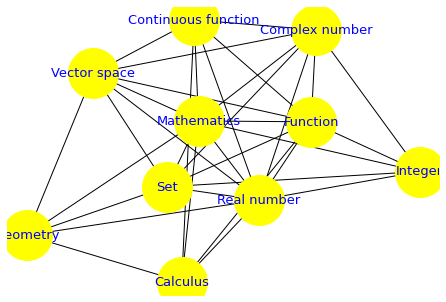

In [1071]:
import networkx as nx

freq_edges = []
for edge in edges:
    i, j = edge
    if i in freq_nodes and j in freq_nodes:
        freq_edges.append((i, j))

labeldict = {}
for i in freq_nodes:
    labeldict[i] = idx_to_topic[i]

labeldict[45] = 'Set'
labeldict[70] = 'Function'

G=nx.Graph()
G.add_nodes_from(freq_nodes)
G.add_edges_from(freq_edges)
    
nx.draw(G, nodelist = freq_nodes, edgelist = freq_edges, labels=labeldict, \
        node_color='yellow', font_color='blue', node_size=2500,font_size=13)

# Graph Partition

## Graph Partition - First

The first one is to cut the graph where the largest jump happens in the values of Fiedler vector.

In [1072]:
class GraphPartition():
    def __init__(self, number_of_nodes, edges, n_comm = 3, n_divide = 3):
        self.n_nodes = number_of_nodes
        self.edges = edges
        self.n_divide = n_divide
        self.n_comm = n_comm
        
        self.mat_A = None
        self.mat_L = None
        self.vec_fiedler = None
        self.n_cuts = 0
        self.cuts = dict()
        
        self.eval = []
        self.evec = []
        
    def initialize(self):
        mat_A = np.zeros((self.n_nodes, self.n_nodes))
        for i, j in self.edges:
            mat_A[i, j] = 1
            mat_A[j, i] = 1
        self.mat_A = mat_A
        
        
        diag = np.sum(mat_A, axis = 1)
        mat_D = np.diag(diag)
        self.mat_L = mat_D - mat_A
        
    def find_fiedler(self):
        self.evals = np.linalg.eig(self.mat_L)[0]
        self.evecs = np.linalg.eig(self.mat_L)[1]

        self.evals_sorted = self.evals.copy()
        self.evals_sorted.sort()
        
        self.fiedler_idx = np.where(self.evals == self.evals_sorted[1])[0][0]
        self.fiedler = self.evecs[:, self.fiedler_idx]
   

    def cut(self, n_comm = None):
        self.n_comm = n_comm
        fiedler_sorted = self.fiedler.copy()
        fiedler_sorted.sort()
        self.fiedler_sorted = fiedler_sorted
        gaps = []
        for i in range(len(fiedler_sorted) - 1):
            gaps.append(fiedler_sorted[i+1] - fiedler_sorted[i])
        gaps_sorted = gaps.copy()
        gaps_sorted.sort(reverse = True)
        
        n_cuts = self.n_comm - 1
        cut_idx = []
        gaps_to_cut = gaps_sorted[:n_cuts]
        
        self.comm = dict()
        for i in range(self.n_comm):
            self.comm[i] = []
        for gap in gaps_to_cut:
            cut_idx.append(gaps.index(gap))
        cut_idx.sort()
        thresholds= []
        for i in cut_idx:
            thresholds.append((fiedler_sorted[i] + fiedler_sorted[i+1]) / 2.)
        thresholds.sort()
        node_list = list(np.linspace(0, self.n_nodes-1, self.n_nodes))
        node_list = [int(x) for x in node_list]
        
        for i in range(n_cuts):
            self.comm[i] = list(np.where(self.fiedler < thresholds[i])[0])
        self.comm[n_cuts] = node_list
        
        for i in range(self.n_comm - 1):
            self.comm[self.n_comm - 1 - i] = list(set(self.comm[self.n_comm - 1 - i]) - set(self.comm[self.n_comm - i - 2]))
        
    
    def fiedler_plot(self, after_n_cuts=0):
        scatter_data = list(self.fiedler_sorted.copy())
        for i in range(after_n_cuts):
            scatter_data.pop()
        m = len(scatter_data)
        x_val = np.linspace(0, m-1, m)
        plt.plot(x_val, scatter_data, '-o')
        plt.title("Sorted Fiedler Vector Plot")
        plt.show()# Check the data type and the length
print("Type of the data is {} and its length is {}".format(type(data), len(data)))

Type of the data is <class 'dict'> and its length is 735


In [1073]:
gp = GraphPartition(number_of_nodes = n_nodes, edges = edges)
gp.initialize()
gp.find_fiedler()

### Cluster after 1 cut

In [1074]:
n_comm = 2
gp.cut(n_comm = n_comm)
for i in range(0, n_comm):
    print("\nThe {}-th cluster is".format(i))
    for j in range(len(gp.comm[i])):
        if j < 10:
            print('{}-th node {}'.format(gp.comm[i][j], idx_to_topic[gp.comm[i][j]]))
        if j == 10:
            print('and more...')


The 0-th cluster is
0-th node Mathematics
1-th node Number theory
2-th node Algebra
3-th node Geometry
4-th node Calculus
5-th node Mathematical analysis
6-th node Conjecture
7-th node Mathematical proof
8-th node Counting
9-th node Shape
and more...

The 1-th cluster is
1053-th node Kolmogorov structure function


### Cluster after 2 cuts

In [1075]:
n_comm = 3
gp.cut(n_comm = n_comm)
for i in range(0, n_comm):
    print("\nThe {}-th cluster is".format(i))
    for j in range(len(gp.comm[i])):
        if j < 10:
            print('{}-th node {}'.format(gp.comm[i][j], idx_to_topic[gp.comm[i][j]]))
        if j == 10:
            print('and more...')


The 0-th cluster is
0-th node Mathematics
1-th node Number theory
2-th node Algebra
3-th node Geometry
4-th node Calculus
5-th node Mathematical analysis
6-th node Conjecture
7-th node Mathematical proof
8-th node Counting
9-th node Shape
and more...

The 1-th cluster is
595-th node Kolmogorov complexity

The 2-th cluster is
1053-th node Kolmogorov structure function


### Cluster after 3 cuts

In [1076]:
n_comm = 4
gp.cut(n_comm = n_comm)
for i in range(0, n_comm):
    print("\nThe {}-th cluster is".format(i))
    for j in range(len(gp.comm[i])):
        if j < 10:
            print('{}-th node {}'.format(gp.comm[i][j], idx_to_topic[gp.comm[i][j]]))
        if j == 10:
            print('and more...')


The 0-th cluster is
1067-th node Cache replacement policies

The 1-th cluster is
0-th node Mathematics
1-th node Number theory
2-th node Algebra
3-th node Geometry
4-th node Calculus
5-th node Mathematical analysis
6-th node Conjecture
7-th node Mathematical proof
8-th node Counting
9-th node Shape
and more...

The 2-th cluster is
595-th node Kolmogorov complexity

The 3-th cluster is
1053-th node Kolmogorov structure function


### Clusters after 7 cuts

In [1077]:
n_comm = 8
gp.cut(n_comm = n_comm)
for i in range(0, n_comm):
    print("\nThe {}-th cluster is".format(i))
    for j in range(len(gp.comm[i])):
        if j < 10:
            print('{}-th node {}'.format(gp.comm[i][j], idx_to_topic[gp.comm[i][j]]))
        if j == 10:
            print('and more...')


The 0-th cluster is
1067-th node Cache replacement policies

The 1-th cluster is
0-th node Mathematics
1-th node Number theory
2-th node Algebra
3-th node Geometry
4-th node Calculus
5-th node Mathematical analysis
6-th node Conjecture
7-th node Mathematical proof
8-th node Counting
9-th node Shape
and more...

The 2-th cluster is
365-th node Pigeonhole principle
53-th node Entropy (information theory)
150-th node Model of computation
1054-th node Gap theorem

The 3-th cluster is
741-th node Universal Turing machine
747-th node Gödel numbering
910-th node Telephone number
978-th node Shellsort
735-th node Blum's speedup theorem

The 4-th cluster is
52-th node Data compression

The 5-th cluster is
734-th node Blum axioms

The 6-th cluster is
595-th node Kolmogorov complexity

The 7-th cluster is
1053-th node Kolmogorov structure function


## Check the edges of single separated nodes.

In [1078]:
single_separated_nodes = [1053, 595, 1067, 734, 52]
for node in single_separated_nodes:
    print("The number of edges of {} is {}".format(idx_to_topic[node], n_edges[node]))

The number of edges of Kolmogorov structure function is 1
The number of edges of Kolmogorov complexity is 26
The number of edges of Cache replacement policies is 1
The number of edges of Blum axioms is 7
The number of edges of Data compression is 15


### Gaps in values of the Fiedler Vector

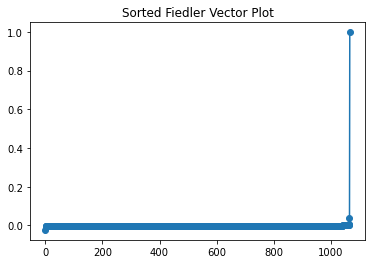

In [1079]:
# Plot the sorted fiedler vector
scatter_data = [value for value in gp.fiedler_sorted]
x_val = np.linspace(0, gp.n_nodes-1, gp.n_nodes)
plt.plot(x_val, scatter_data, '-o')
plt.title("Sorted Fiedler Vector Plot")
plt.show()

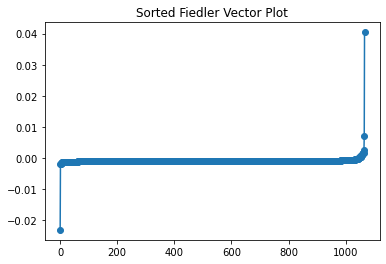

In [1080]:
# Plot the sorted fiedler vector
scatter_data = [value for value in gp.fiedler_sorted]
x_val = np.linspace(0, gp.n_nodes-1, gp.n_nodes)
plt.plot(x_val[:-1], scatter_data[:-1], '-o')
plt.title("Sorted Fiedler Vector Plot")
plt.show()

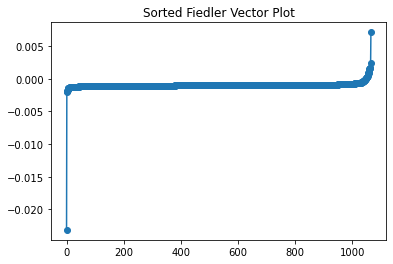

In [1081]:
# Plot the sorted fiedler vector
scatter_data = [value for value in gp.fiedler_sorted]
x_val = np.linspace(0, gp.n_nodes-1, gp.n_nodes)
plt.plot(x_val[:-2], scatter_data[:-2], '-o')
plt.title("Sorted Fiedler Vector Plot")
plt.show()

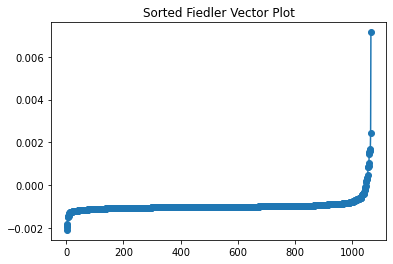

In [1082]:
# Plot the sorted fiedler vector
scatter_data = [value for value in gp.fiedler_sorted]
x_val = np.linspace(0, gp.n_nodes-1, gp.n_nodes)
plt.plot(x_val[1:-2], scatter_data[1:-2], '-o')
plt.title("Sorted Fiedler Vector Plot")
plt.show()

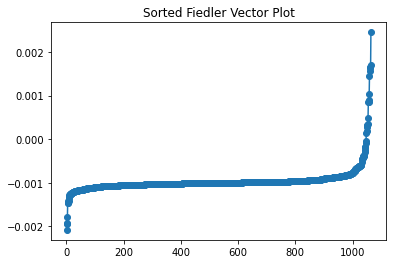

In [1083]:
# Plot the sorted fiedler vector
scatter_data = [value for value in gp.fiedler_sorted]
x_val = np.linspace(0, gp.n_nodes-1, gp.n_nodes)
plt.plot(x_val[1:-3], scatter_data[1:-3], '-o')
plt.title("Sorted Fiedler Vector Plot")
plt.show()

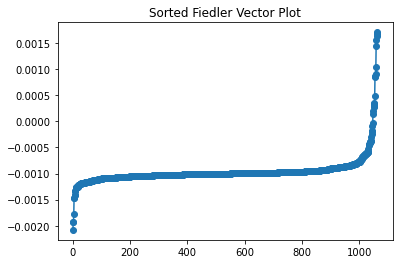

In [1084]:
# Plot the sorted fiedler vector
scatter_data = [value for value in gp.fiedler_sorted]
x_val = np.linspace(0, gp.n_nodes-1, gp.n_nodes)
plt.plot(x_val[1:-4], scatter_data[1:-4], '-o')
plt.title("Sorted Fiedler Vector Plot")
plt.show()

## Graph Partition - Second

In the second Graph Partition, choose multiple eigenvectors and cut by components of postive and negative values of the eigenvectors.

In [1085]:
class GraphPartition_2(GraphPartition):
    
    def find_fiedlers(self):
        self.evals = np.linalg.eig(self.mat_L)[0]
        self.evecs = np.linalg.eig(self.mat_L)[1]

        self.evals_sorted = self.evals.copy()
        self.evals_sorted.sort()
        
        self.evals_idx = []
        for i in range(self.n_divide):
            self.evals_idx.append(np.where(self.evals == self.evals_sorted[i+1])[0][0])
            
        self.fiedlers = []
        for idx in self.evals_idx:
            self.fiedlers.append(self.evecs[:, idx])

    def divide(self):
        nodes = list(range(self.n_nodes))
        comm = [0] * self.n_nodes
        
        for i in range(len(self.fiedlers)):
            fi = self.fiedlers[i]
            divide_1 = list(np.where(fi <= 0)[0])
            divide_2 = list(np.where(fi > 0)[0])
            for idx in divide_1:
                comm[idx] += 0
            for idx in divide_2:
                comm[idx] += 2**i
        
        
        community = dict()
        for i in range(2**self.n_divide):
            community[i] = []
            
        for idx, val in enumerate(comm):
            community[val].append(idx)
        
        self.community = community

        
    def show_evecs(self):
        n_figure = self.n_divide

        x_val = np.linspace(0, n_nodes-1, num=n_nodes)
        
        if n_figure > 1:
            fig, axs = plt.subplots(1,n_figure, figsize=(15,5))
            for i in range(n_figure):
                fi = self.fiedlers[i]
                fi.sort()
                
                idx = list(np.where(fi<0)[0])[-1]
                
                color = []
                for j in fi:
                    if j < 0:
                        color.append(245)
                    else:
                        color.append(100)

                axs[i].plot(x_val[:idx], fi[:idx], '-o', c='red')
                axs[i].plot(x_val[idx:], fi[idx:], '-o', c='blue')
            plt.show()
            
        else:
            fi = self.fiedlers[0]
            fi.sort()
            plt.figure() 
            plt.plot(x_val,fi)
            plt.show()


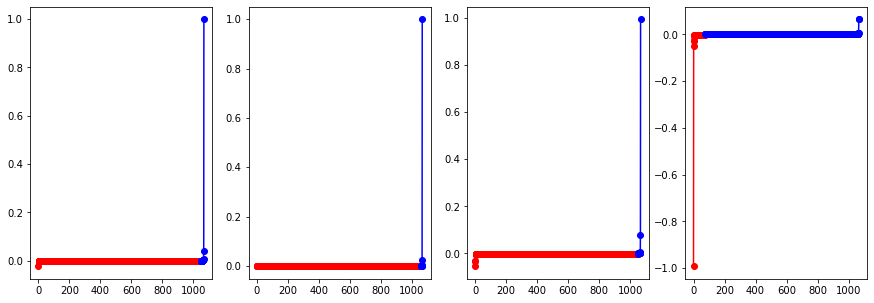

In [1086]:
gp_2 = GraphPartition_2(number_of_nodes = n_nodes, edges = edges, n_divide = 4)
gp_2.initialize()
gp_2.find_fiedlers()
gp_2.divide()
gp_2.show_evecs()

In [1087]:
for key, value in gp_2.community.items():
    if len(value) == 0:
        print('\nThere is no node in the cluster {}'.format(key))
        continue
    print('\nThe nodes of cluster {} are'.format(key))
    for i in range(len(value)):
        print('{}-th node {}'.format(value[i], idx_to_topic[value[i]]))
        if i == 10:
            print('and more')
            break


The nodes of cluster 0 are
13-th node Statistics
99-th node Design of experiments
100-th node Observational study
101-th node Statistical hypothesis testing
317-th node Fourier analysis
341-th node Probability distribution
342-th node Random variable
359-th node Bayes' theorem
417-th node Normal distribution
418-th node Probability density function
419-th node Central limit theorem
and more

There is no node in the cluster 1

There is no node in the cluster 2

The nodes of cluster 3 are
1053-th node Kolmogorov structure function

There is no node in the cluster 4

The nodes of cluster 5 are
52-th node Data compression
910-th node Telephone number

The nodes of cluster 6 are
1067-th node Cache replacement policies

There is no node in the cluster 7

The nodes of cluster 8 are
0-th node Mathematics
1-th node Number theory
2-th node Algebra
3-th node Geometry
4-th node Calculus
5-th node Mathematical analysis
6-th node Conjecture
7-th node Mathematical proof
8-th node Counting
9-th node 

The red dots are negative values and blue are positive. From the left, the eigenvectors corresponds to the 2nd, 3rd, 4th and 5th smallest eigenvalues.

# BigCLAM

BigCLAM algorithm is implemented to find multi-communities association scores for each node

In [1088]:
class BigCLAM():
    def __init__(self, number_of_nodes, edges, n_iter = 10, n_comm = 3, idx = None):
        self.n_nodes = number_of_nodes
        self.edges = edges
        self.n_iter = n_iter
        if idx == None:
            self.n_comm = n_comm
        else:
            self.n_comm = len(idx)
        self.mat_A = None
        self.mat_F = None
        self.eta = 0.00002
        self.idx = idx
    
    def initialize(self):
        mat_A = np.zeros((self.n_nodes, self.n_nodes))
        for i, j in self.edges:
            mat_A[i, j] = 1
            mat_A[j, i] = 1
        self.mat_A = mat_A

        mat_F = np.full((self.n_nodes, self.n_comm), 0.001)
        if self.idx != None:
            for i in range(len(self.idx)):
                mat_F[self.idx[i], i] = 100
                
        self.mat_F = mat_F

    def convergence(self, dist=0.001):
        old_mat = self.mat_F 
        new_mat = self.new_F 
        size = old_mat.shape[0] * old_mat.shape[1]
        old_mat.reshape((size,))
        new_mat.reshape((size,))
        l2_norm = np.linalg.norm(old_mat - new_mat)
        if l2_norm < dist:
            return True
        else:
            return False
    
    def normalize(self, mat):
        col_sum = np.sum(mat, axis = 0)
        return 100 * mat / col_sum

    def gradient(self):
        
        mat_FFT = np.matmul(self.mat_F, np.transpose(self.mat_F))

        mat_FFT[np.where(mat_FFT==0)] = 0.01
        _ = 1./(1.-np.exp(-mat_FFT))

        _FIRST = np.matmul((self.mat_A * _), self.mat_F)
        _ones = np.ones_like(self.mat_F)
    
        self.grad = _FIRST + self.mat_F - _ones

    def reset_F(self, idx=[2,3,5], assign = [0, 1, 2]):
        if idx != None:
            for i in range(len(idx)):
                self.mat_F[idx[i], i] = 100
                for j in range(3):
                    if j != i:
                        self.mat_F[idx[i], j] = 0

    def neg_to_zeor_new_F(self):
        self.new_F[self.new_F < 0] = 0
    
    def one_iteration(self):
        self.mat_F = self.normalize(self.mat_F)      
        self.gradient()
        self.new_F = self.mat_F + self.eta * self.grad
        self.neg_to_zeor_new_F()        
        self.new_F = self.normalize(self.new_F)
                
    def run_BigCLAM(self):
        if self.n_iter == None:
            converge = False
            count = 0
            while not converge:
                count += 1
                self.one_iteration()
                converge = self.convergence()
                self.mat_F = self.new_F
        
        else:
            i = 0
            while i < self.n_iter:
                i += 1
                self.one_iteration()
                self.mat_F = self.new_F
                
        
        return self.new_F
    
    def community_class(self):   
        label_C = []
        for row in self.new_F:
            label_C.append(np.argmax(row))
        self.label_C = np.array(label_C)
        
        return self.label_C
    
    def print_community(self, i):
        list_i = list(np.where(self.label_C == i)[0])
        for i in list_i:
            print(idx_to_topic[i])

    
    def community_list(self, i = 0):
        list_i = list(np.where(self.label_C == i)[0])
        return list_i

## BigCLAM with No initialization

Without initializaing any nodes, the result shows that each node has equal community affiliation scores. The default number of communities is 3.

In [1089]:
bc = BigCLAM(number_of_nodes = n_nodes, edges = edges, n_iter = None)
bc.initialize()
result_F = bc.run_BigCLAM()
label = bc.community_class()

In [1090]:
bc.mat_F

array([[0.33303361, 0.33303361, 0.33303361],
       [0.1901493 , 0.1901493 , 0.1901493 ],
       [0.16471208, 0.16471208, 0.16471208],
       ...,
       [0.02498366, 0.02498366, 0.02498366],
       [0.02497618, 0.02497618, 0.02497618],
       [0.01527516, 0.01527516, 0.01527516]])

In [1091]:
for i in range(len(bc.mat_F)):
    row = bc.mat_F[i]
    if row[0] == row[1] and row[1] == row[2]:
        pass
    else:
        print('The node {} has different community association'.format(i))
    

The node 602 has different community association


In [1092]:
idx_to_topic[602]

'Conformal map'

In [1093]:
for i in bc.mat_F[602]:
    print(i)

0.08500390163521489
0.08500390163521489
0.0850039016352149


Only the node `Conformal map` doesn't have not equivalent community associations but the difference is less than $10^{-16}$, which is considered equal. So, without initialization, all belongs to all communities with same strength.

## Initialize 3 nodes - 'Algebra', 'Geometry' and 'Mathematical Analysis'

In [1094]:
# edges = data['edges']
# n_nodes = len(data['node_ids'])

bc_init_1 = BigCLAM(number_of_nodes = n_nodes, edges = edges, n_iter = None, idx=[2, 3, 5])
bc_init_1.initialize()
result_F = bc_init_1.run_BigCLAM()
label_1 = bc_init_1.community_class()

### Nodes associated to 'Algebra'

In [1095]:
bc_init_1.print_community(i = 0)

Mathematics
Number theory
Algebra
Conjecture
Mathematical proof
Counting
Foundations of mathematics
Axiom
Pure mathematics
Arithmetic
Addition
Subtraction
Multiplication
Division (mathematics)
Gödel's incompleteness theorems
Group theory
Prime number
Fast Fourier transform
Recreational mathematics
Field (mathematics)
Axiomatic system
Set theory
Mathematical logic
Set (mathematics)
Model theory
Category theory
Turing machine
Theory of computation
Natural number
Integer
Twin prime
Goldbach's conjecture
Rational number
Group (mathematics)
Ring (mathematics)
Abstract algebra
Galois theory
Linear algebra
Vector space
Combinatorics
Graph theory
Order theory
Polynomial
Design of experiments
Observational study
Statistical hypothesis testing
Mathematical problem
Algorithm
Hilbert's problems
Commutative algebra
Elementary algebra
Algebraic number theory
Analytic number theory
Arithmetic function
Irrational number
Chinese remainder theorem
Kuṭṭaka
Euclidean algorithm
Elliptic curve
Wilson's theo

## Add 'Topology' and 'Set Theory' to the initialization

In [1096]:
bc_init_2 = BigCLAM(number_of_nodes = n_nodes, edges = edges, n_iter = None, idx = [2, 3, 5, 81, 41])
bc_init_2.initialize()
result_F_2 = bc_init_2.run_BigCLAM()
label_2 = bc_init_2.community_class()

### Nodes associated to 'Topology'

In [1097]:
bc_init_2.print_community(i = 3)

Mathematics
Conjecture
Recreational mathematics
Open set
Riemann surface
Graph theory
Topology
Algebraic topology
Poincaré conjecture
Algebraic number field
Homological algebra
Topological space
Metric space
Sheaf (mathematics)
Transfer principle
Weierstrass function
Real line
Modularity theorem
Tree (graph theory)
Compact space
Vector field
Homotopy
Winding number
Mandelbrot set
Critical point (mathematics)
Zero of a function
Fundamental group
Functor
Knot theory
Mathematical puzzle
Homology (mathematics)
Elliptic function
Graph coloring
Natural transformation
Adjacency matrix
Connectivity (graph theory)
Cantor set
Julia set
Lemniscate
Banach space
Seven Bridges of Königsberg
Crossing number (graph theory)
Degree matrix
Laplacian matrix
Degree (graph theory)
Homeomorphism (graph theory)
Kuratowski's theorem
Flow network
Matching (graph theory)
Intersection graph
Kruskal's algorithm
Push–relabel maximum flow algorithm
Eulerian path
Snark (graph theory)
Dynamical systems theory
Limit cy

### Nodes associated to 'Set Theory'

In [1098]:
bc_init_2.print_community(i = 4)

Mathematical proof
Counting
Foundations of mathematics
Axiom
Game theory
Gödel's incompleteness theorems
Theorem
Proof by contradiction
Operations research
If and only if
Axiomatic system
Set theory
Mathematical logic
Discrete mathematics
Set (mathematics)
Model theory
Theoretical computer science
Category theory
Computational complexity theory
Turing machine
Theory of computation
Natural number
Subset
Cardinal number
Aleph number
Function (mathematics)
Combinatorics
Order theory
Mathematical problem
Algorithm
Model of computation
Formal language
Computability theory
Analysis of algorithms
Probability
Associative property
Commutative property
Boolean algebra
Boolean algebra (structure)
Element (mathematics)
General topology
Propositional calculus
Lambda calculus
Naive set theory
Ordered pair
Empty set
Union (set theory)
Intersection (set theory)
Complement (set theory)
Axiom of choice
P versus NP problem
Continuum hypothesis
Mathematical induction
Data structure
Material conditional
Co

## Add 'Applied Mathematics' and 'Statistics' to the initialization

In [1099]:
bc_init_3 = BigCLAM(number_of_nodes = n_nodes, edges = edges, n_iter = None, idx = [2, 3, 5, 81, 41, 12, 13])
bc_init_3.initialize()
result_F_3 = bc_init_3.run_BigCLAM()
label_3 = bc_init_3.community_class()

### Nodes associated to 'Applied Mathematics'

In [1100]:
bc_init_3.print_community(i = 5)

Applied mathematics
Game theory
Pure mathematics
Operations research
Recreational mathematics
Functional analysis
Differential equation
Dynamical system
Chaos theory
Mathematical optimization
Control theory
Numerical analysis
Harmonic analysis
Analysis of algorithms
Exterior algebra
Linear programming
Euler method
Numerical integration
Differential operator
Ordinary differential equation
Partial differential equation
Coding theory
Tensor
Numerical methods for ordinary differential equations
Potential theory
Social choice theory
Mathematician
Finite element method
Nonlinear system
Phase space
Bifurcation theory
Big O notation
Parabolic partial differential equation
Simplex algorithm
Assignment problem
Dynamic programming
Hash table
Divide-and-conquer algorithm
Recurrence relation
Hamming code
Linear differential equation
Quicksort
Linearization
Eigenvalues and eigenvectors
Boundary value problem
Shortest path problem
Flow network
Bellman–Ford algorithm
Breadth-first search
Dijkstra's al

### Nodes associated to 'Statistics'

In [1053]:
bc_init_3.print_community(i = 6)

Statistics
Information theory
Data compression
Entropy (information theory)
Probability theory
Design of experiments
Observational study
Statistical hypothesis testing
Approximation theory
Probability
Fourier analysis
Fourier transform
Markov chain
Probability distribution
Random variable
Stochastic process
Pascal's triangle
Bayes' theorem
Asymptotic analysis
Normal distribution
Probability density function
Central limit theorem
Statistical population
Mean
Standard deviation
Sampling (statistics)
Correlation and dependence
Regression analysis
Interpolation
Variance
Type I and type II errors
Confidence interval
Randomized controlled trial
Analysis of variance
Expected value
Linear regression
Ordinary least squares
Frequentist inference
Credible interval
Bayesian statistics
Statistical significance
P-value
Bayesian inference
Prior probability
Chi-squared test
Student's t-test
Binomial distribution
Survey methodology
Arithmetic mean
Geometric mean
Harmonic mean
Median
Mode (statistics)
Mo

## Soft clustering of communities

In [1109]:
topics = [57, 84, 164, 604]
for topic in topics:
    row = bc_init_3.mat_F[topic]
    scores = list(row)
    scores.sort(reverse = True)
    classification = []
    for i in range(2):
        idx = np.where(row == scores[i])[0]
        classification.append(idx[0])
    print('The topic {} is likely to be in the community {} and {}'.format(idx_to_topic[topic], classification[0], classification[1]))


The topic Fermat's Last Theorem is likely to be in the community 1 and 0
The topic Algebraic geometry is likely to be in the community 1 and 3
The topic Linear equation is likely to be in the community 0 and 1
The topic Functor is likely to be in the community 3 and 4
